In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
df = pd.read_csv("../data/wvtr_synthetic_data.csv")
df.head()

,Temperature_C,RelativeHumidity_%,CoatingWeight_gm2,WVTR_gm2_day
0,31.159525,64.787948,28.122796,3.656190e+05
1,37.508549,48.592505,50.731232,2.684018e+05
2,54.807167,75.622773,34.952477,2.209159e+06
3,54.445479,45.465068,32.916914,1.226497e+06
4,43.429555,83.765196,27.461120,1.400056e+06


In [5]:
X = df[["Temperature_C", "RelativeHumidity_%", "CoatingWeight_gm2"]]
y = df["WVTR_gm2_day"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mae


90830.73699841076

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2


0.9729328002191826

In [10]:
rel_mae = mae / y_test.mean()
rel_mae


np.float64(0.07585714214913765)

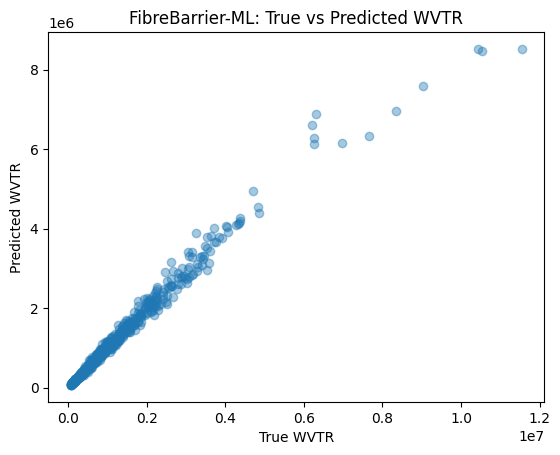

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("True WVTR")
plt.ylabel("Predicted WVTR")
plt.title("FibreBarrier-ML: True vs Predicted WVTR")
plt.show()
